In [ ]:
import yfinance as yf  # Download historical prices and everything related to actions
import pandas as pd

# Define the Nvidia Ticker
ticker = 'AAPL'

# Define the range of dates with literal final date
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(years=1)

# Download the Price Historic
nvidia_data = yf.download(ticker, start=start_date, end=end_date)

# Show the first records of Dataframe
print(nvidia_data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-19  193.100006  198.229996  192.649994  195.100006  194.069336   
2023-07-20  195.089996  196.470001  192.500000  193.130005  192.109741   
2023-07-21  194.100006  194.970001  191.229996  191.940002  190.926056   
2023-07-24  193.410004  194.910004  192.250000  192.750000  191.731766   
2023-07-25  193.330002  194.440002  192.919998  193.619995  192.597168   

              Volume  
Date                  
2023-07-19  80507300  
2023-07-20  59581200  
2023-07-21  71917800  
2023-07-24  45377800  
2023-07-25  37283200  


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers of the actions
tickers = ['NVDA', 'KO', 'INTC']

# Define the range of dates
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(months=6)

# Download the Price Historic
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()
# Calculate returns
returns = data.pct_change().dropna()
returns.head()

[*********************100%%**********************]  3 of 3 completed


Ticker,INTC,KO,NVDA
Date,,,
2024-01-22,0.001454,-0.004346,0.002740
2024-01-23,0.013895,0.004700,0.003671
2024-01-24,0.004091,-0.015706,0.024869
2024-01-25,0.009371,0.004244,0.004156
2024-01-26,-0.119072,0.003550,-0.009510


(array([ 1.,  1.,  1.,  2.,  6., 25., 48., 34.,  5.,  1.]),
 array([-0.11907165, -0.10101207, -0.0829525 , -0.06489293, -0.04683335,
        -0.02877378, -0.01071421,  0.00734537,  0.02540494,  0.04346451,
         0.06152408]),
 <BarContainer object of 10 artists>)

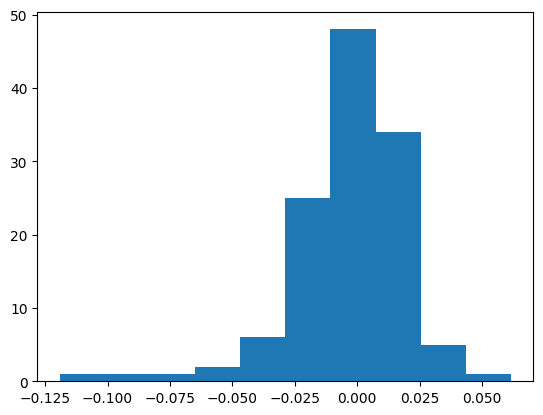

In [ ]:
plt.hist(returns["INTC"])

[*********************100%%**********************]  3 of 3 completed


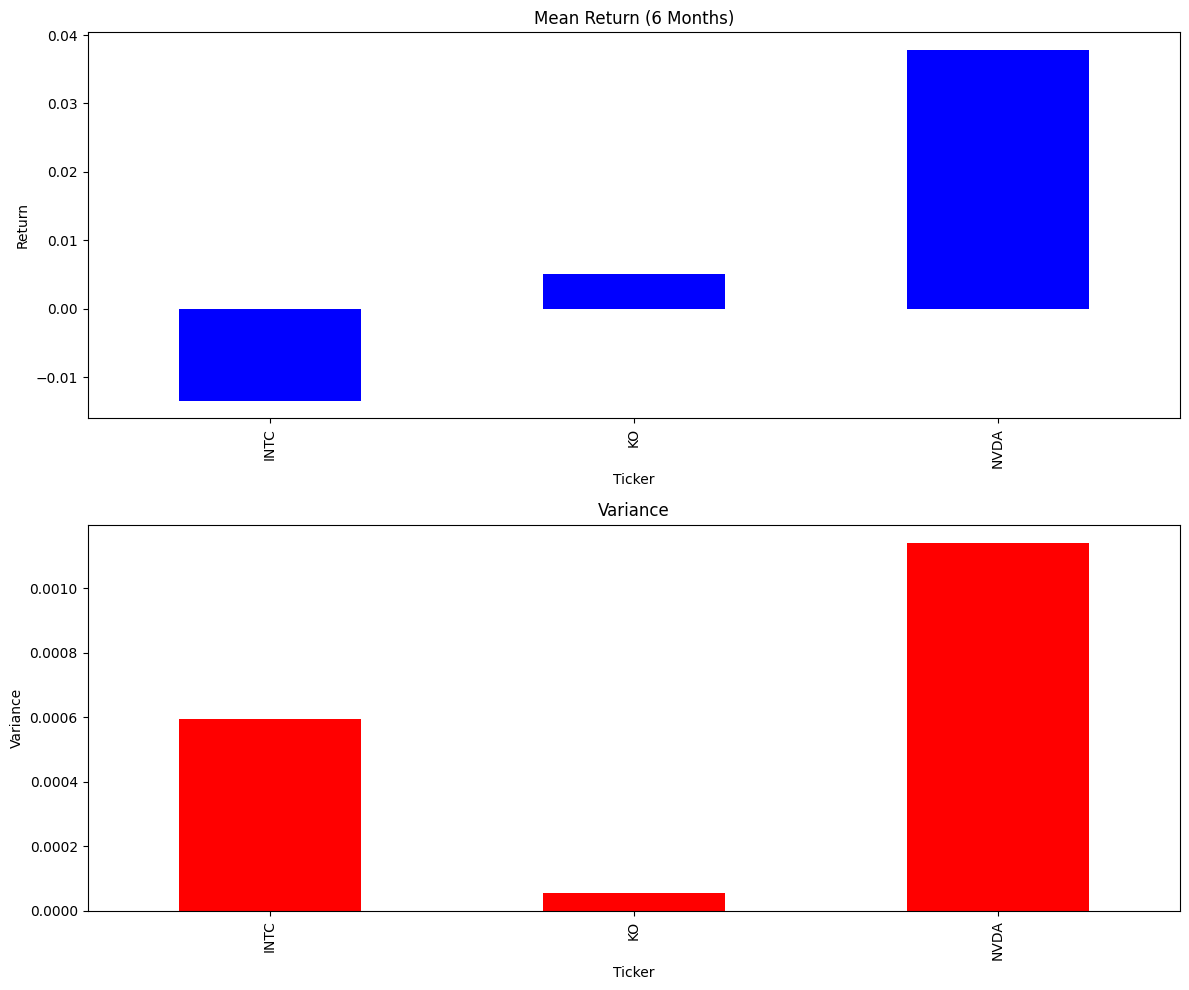

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers of the actions
tickers = ['NVDA', 'KO', 'INTC']

# Define the range of dates
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(months=6)

# Download the Price Historic
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Calculate the average return of 6 months and the variance
mean_returns = returns.mean() * 6  # Multiply by 6 to annualize the average monthly return
variance = returns.var()

# Create a dataframe with the results
results = pd.DataFrame({'Mean Return (6M)': mean_returns, 'Variance': variance})

# Graph the results
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Average return chart of 6 months
results['Mean Return (6M)'].plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Mean Return (6 Months)')
ax[0].set_ylabel('Return')
ax[0].set_xlabel('Ticker')

# Variance graph
results['Variance'].plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Variance')
ax[1].set_ylabel('Variance')
ax[1].set_xlabel('Ticker')

plt.tight_layout()
plt.show()


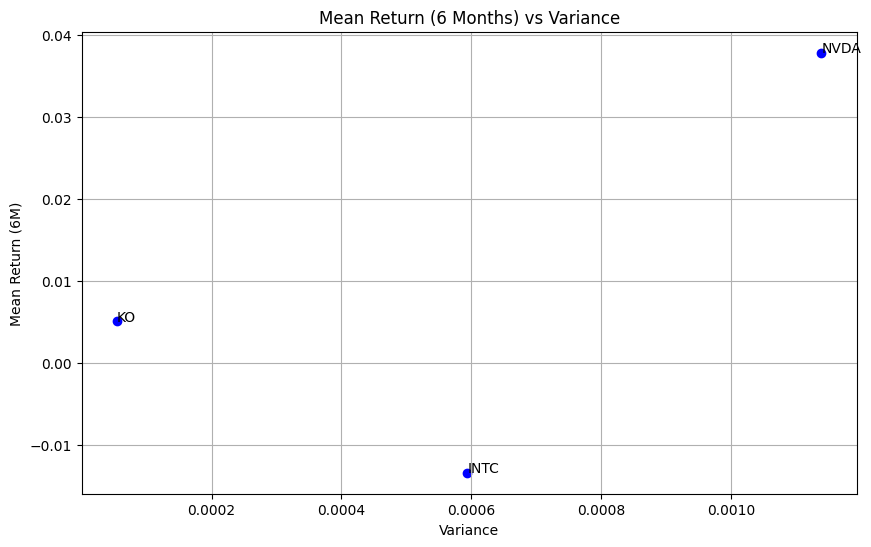

In [ ]:
# Create a dataframe with the results
results = pd.DataFrame({'Mean Return (6M)': mean_returns, 'Variance': variance})

# Graph the results in a Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(results['Variance'], results['Mean Return (6M)'], color='blue')

# Add labels for each point
for i, ticker in enumerate(results.index):
    plt.annotate(ticker, (results['Variance'][i], results['Mean Return (6M)'][i]))

plt.title('Mean Return (6 Months) vs Variance')
plt.xlabel('Variance')
plt.ylabel('Mean Return (6M)')
plt.grid(True)
plt.show()

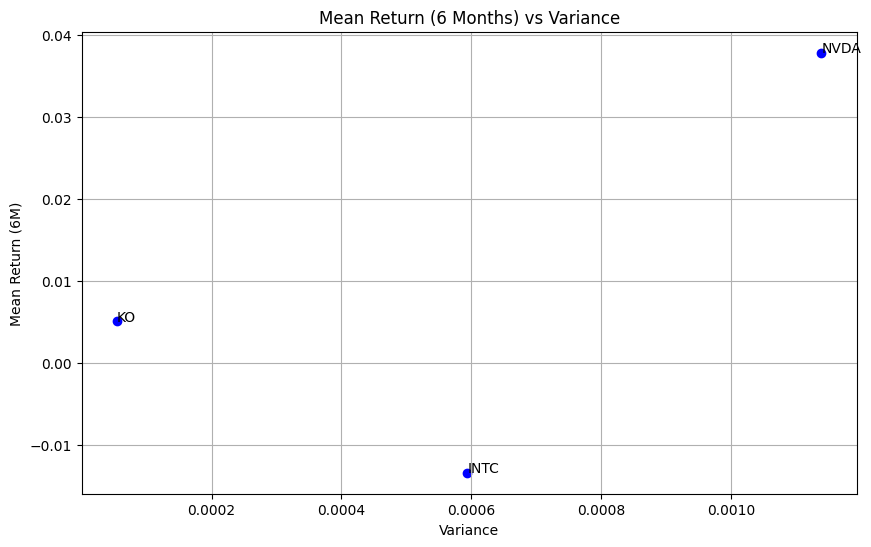

Covariance Matrix:
Ticker      INTC        KO      NVDA
Ticker                              
INTC    0.000594  0.000014  0.000097
KO      0.000014  0.000054 -0.000080
NVDA    0.000097 -0.000080  0.001139


In [ ]:
# Calculate the covariance matrix
cov_matrix = returns.cov()

# Create a dataframe with the results
results = pd.DataFrame({'Mean Return (6M)': mean_returns, 'Variance': variance})

# Graph the results in a Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(results['Variance'], results['Mean Return (6M)'], color='blue')

# Add labels for each point
for i, ticker in enumerate(results.index):
    plt.annotate(ticker, (results['Variance'][i], results['Mean Return (6M)'][i]))

plt.title('Mean Return (6 Months) vs Variance')
plt.xlabel('Variance')
plt.ylabel('Mean Return (6M)')
plt.grid(True)
plt.show()

# Show the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

[*********************100%%**********************]  3 of 3 completed


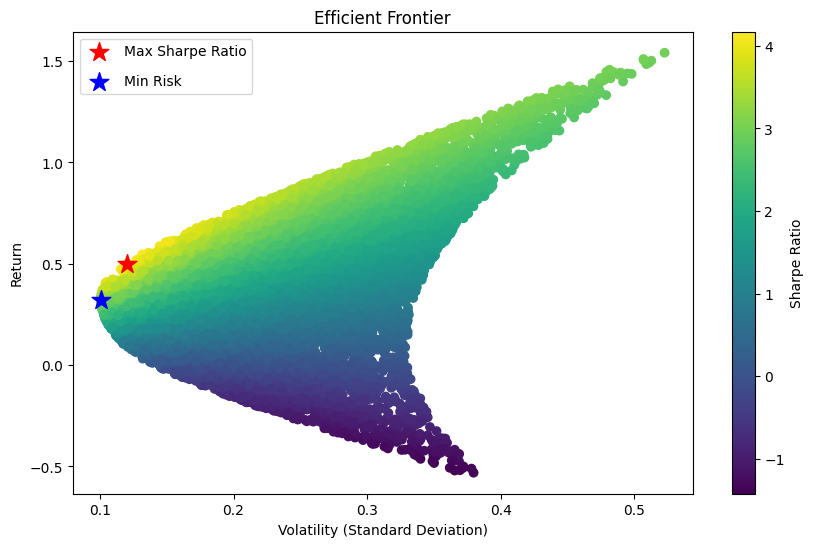

Portafolio con el mayor Sharpe Ratio
Return                   0.501403
Standard Deviation       0.120227
Sharpe Ratio             4.170478
Index                 5919.000000
Name: 5919, dtype: float64

Portafolio con el menor riesgo
Return                   0.323827
Standard Deviation       0.100760
Sharpe Ratio             3.213860
Index                 2699.000000
Name: 2699, dtype: float64


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers of the actions
tickers = ['NVDA', 'KO', 'INTC']

# Define the range of dates
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(months=6)

# Download the Price Historic
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Calculate the average return and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    portfolio_return = np.sum(weights * mean_returns) * 252  # annualized
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # annualized

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = results[0, i] / results[1, i]  # Sharpe ratio
    results[3, i] = i  # Index for retrieval

# Convert the results to a dataframe
results_frame = pd.DataFrame(results.T, columns=['Return', 'Standard Deviation', 'Sharpe Ratio', 'Index'])

# Find the portfolio with the greatest share ratio
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]
# Find the portfolio with the least risk
min_risk_port = results_frame.loc[results_frame['Standard Deviation'].idxmin()]

# Graph the efficient border
plt.figure(figsize=(10, 6))
plt.scatter(results_frame['Standard Deviation'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=200, label='Max Sharpe Ratio')
plt.scatter(min_risk_port[1], min_risk_port[0], marker='*', color='b', s=200, label='Min Risk')

# Add Tags and Title
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend(labelspacing=1.2)
plt.show()

# Show optimal portfolios
print("Portfolio with the greatest share ratio")
print(max_sharpe_port)

print("\ nportafolio with the least risk")
print(min_risk_port)


[*********************100%%**********************]  3 of 3 completed


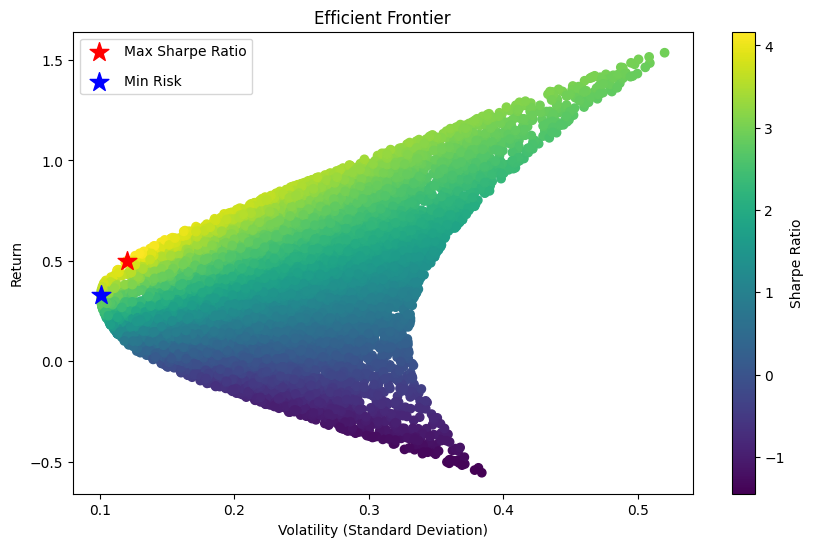

Portafolio con el mayor Sharpe Ratio
Return                  0.499394
Standard Deviation      0.119864
Sharpe Ratio            4.166322
Index                 596.000000
Weight_NVDA             0.000912
Weight_KO               0.790459
Weight_INTC             0.208630
Name: 596, dtype: float64

Portafolio con el menor riesgo
Return                   0.329468
Standard Deviation       0.100869
Sharpe Ratio             3.266292
Index                 2274.000000
Weight_NVDA              0.032459
Weight_KO                0.864606
Weight_INTC              0.102935
Name: 2274, dtype: float64


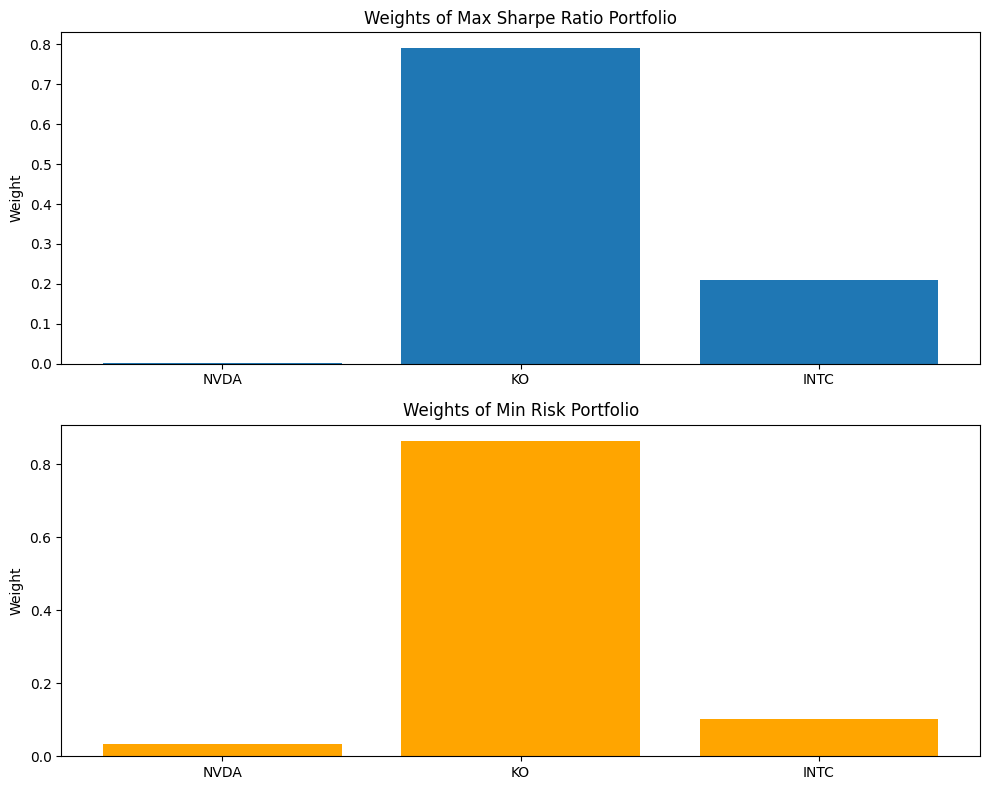

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers of the actions
tickers = ['NVDA', 'KO', 'INTC']

# Define the range of dates
end_date = pd.Timestamp('2024-07-19')
start_date = end_date - pd.DateOffset(months=6)

# Download the Price Historic
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Calculate the average return and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((4 + len(tickers), num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.sum(weights * mean_returns) * 252  # annualized
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # annualized

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = results[0, i] / results[1, i]  # Sharpe ratio
    results[3, i] = i  # Index for retrieval

    for j in range(len(weights)):
        results[4 + j, i] = weights[j]

# Convert the results to a dataframe
columns = ['Return', 'Standard Deviation', 'Sharpe Ratio', 'Index'] + [f'Weight_{ticker}' for ticker in tickers]
results_frame = pd.DataFrame(results.T, columns=columns)

# Find the portfolio with the greatest share ratio
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]
# Find the portfolio with the least risk
min_risk_port = results_frame.loc[results_frame['Standard Deviation'].idxmin()]

# Graph the efficient border
plt.figure(figsize=(10, 6))
plt.scatter(results_frame['Standard Deviation'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=200, label='Max Sharpe Ratio')
plt.scatter(min_risk_port[1], min_risk_port[0], marker='*', color='b', s=200, label='Min Risk')

# Add Tags and Title
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend(labelspacing=1.2)
plt.show()

# Show optimal portfolios
print("Portfolio with the greatest share ratio")
print(max_sharpe_port)

print("\ nportafolio with the least risk")
print(min_risk_port)

# Graph the weights of optimal portfolios
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Portfolio pesos with the greatest shade ratio
ax[0].bar(tickers, max_sharpe_port[4:4 + len(tickers)])
ax[0].set_title('Weights of Max Sharpe Ratio Portfolio')
ax[0].set_ylabel('Weight')

# Portfolio pesos with the lowest risk
ax[1].bar(tickers, min_risk_port[4:4 + len(tickers)], color='orange')
ax[1].set_title('Weights of Min Risk Portfolio')
ax[1].set_ylabel('Weight')

plt.tight_layout()
plt.show()
